# Merge required data

In [1]:
import pandas as pd
import os

os.chdir("./movielens-2k")

cols = ["userID", "movieID", "rating"]
ratings = pd.read_table("user_ratedmovies.dat", usecols=cols)
print(ratings.head())

ratings["userID"] = ratings.userID#.astype("category")#.cat.codes
ratings["movieID"] = ratings.movieID#.astype("category")#.cat.codes
ratings.sort_values(by=["userID", "movieID"], inplace=True)
print(ratings.head())

   userID  movieID  rating
0      75        3     1.0
1      75       32     4.5
2      75      110     4.0
3      75      160     2.0
4      75      163     4.0
   userID  movieID  rating
0      75        3     1.0
1      75       32     4.5
2      75      110     4.0
3      75      160     2.0
4      75      163     4.0


In [2]:
print(ratings.userID.unique().__len__())
print(ratings.movieID.unique().__len__())

2113
10109


In [3]:
cols = ["id", "title", "year", "imdbPictureURL"]
movies = pd.read_table("movies.dat", usecols=cols, encoding="latin-1")
movies["movieID"] = movies.id#.astype("category")#.cat.codes
movies = movies.drop("id", axis=1)
movies.sort_values(by="movieID", inplace=True)
movies.head()

,title,imdbPictureURL,year,movieID
0,Toy story,http://ia.media-imdb.com/images/M/MV5BMTMwNDU0...,1995,1
1,Jumanji,http://ia.media-imdb.com/images/M/MV5BMzM5NjE1...,1995,2
2,Grumpy Old Men,http://ia.media-imdb.com/images/M/MV5BMTI5MTgy...,1993,3
3,Waiting to Exhale,http://ia.media-imdb.com/images/M/MV5BMTczMTMy...,1995,4
4,Father of the Bride Part II,http://ia.media-imdb.com/images/M/MV5BMTg1NDc2...,1995,5


In [4]:
genres = pd.read_table("movie_genres.dat")
print(genres.head())

concat = lambda a: ", ".join(a)

genres = genres.groupby(by="movieID", as_index=False).agg(concat)
genres["movieID"] = genres.movieID#.astype("category")#.cat.codes
genres.reset_index(inplace=True)
genres.drop(["index"], axis=1, inplace=True)
genres.sort_values(by="movieID", inplace=True)
genres.head()


   movieID      genre
0        1  Adventure
1        1  Animation
2        1   Children
3        1     Comedy
4        1    Fantasy


,movieID,genre
0,1,"Adventure, Animation, Children, Comedy, Fantasy"
1,2,"Adventure, Children, Fantasy"
2,3,"Comedy, Romance"
3,4,"Comedy, Drama, Romance"
4,5,Comedy


In [5]:
pd_movies = ratings\
    .merge(movies, on="movieID")\
    .merge(genres, on="movieID")\
    .dropna(axis=0)
pd_movies.sort_values(by=["userID", "movieID"], inplace=True)
# pd_movies.to_csv("data/movies.csv.bz2", encoding="UTF-8", compression="bz2", index=False)

In [6]:
pd_movies.head()

,userID,movieID,rating,title,imdbPictureURL,year,genre
0,75,3,1.0,Grumpy Old Men,http://ia.media-imdb.com/images/M/MV5BMTI5MTgy...,1993,"Comedy, Romance"
252,75,32,4.5,Twelve Monkeys,http://ia.media-imdb.com/images/M/MV5BMTQwNzg2...,1995,"Sci-Fi, Thriller"
1410,75,110,4.0,Braveheart,http://ia.media-imdb.com/images/M/MV5BMTY0ODA1...,1995,"Action, Drama, War"
2647,75,160,2.0,Congo,http://ia.media-imdb.com/images/M/MV5BNjI3MTE5...,1995,"Action, Adventure, Mystery, Sci-Fi"
2945,75,163,4.0,Desperado,http://ia.media-imdb.com/images/M/MV5BMTM5Mzg3...,1995,"Action, Romance, Thriller"


In [7]:
print(pd_movies.userID.unique().__len__())
print(pd_movies.movieID.unique().__len__())

2113
9936


In [8]:
pd_movies["userID"] = pd_movies.userID.astype('category').cat.codes
pd_movies['movieID'] = pd_movies.movieID.astype('category').cat.codes

In [9]:
pd_movies.reset_index(inplace=True, drop=True)
pd_movies.head()

,userID,movieID,rating,title,imdbPictureURL,year,genre
0,0,2,1.0,Grumpy Old Men,http://ia.media-imdb.com/images/M/MV5BMTI5MTgy...,1993,"Comedy, Romance"
1,0,31,4.5,Twelve Monkeys,http://ia.media-imdb.com/images/M/MV5BMTQwNzg2...,1995,"Sci-Fi, Thriller"
2,0,105,4.0,Braveheart,http://ia.media-imdb.com/images/M/MV5BMTY0ODA1...,1995,"Action, Drama, War"
3,0,150,2.0,Congo,http://ia.media-imdb.com/images/M/MV5BNjI3MTE5...,1995,"Action, Adventure, Mystery, Sci-Fi"
4,0,153,4.0,Desperado,http://ia.media-imdb.com/images/M/MV5BMTM5Mzg3...,1995,"Action, Romance, Thriller"


In [10]:
# print(pd_movies.shape)
# print(pd_movies.userID.unique().__len__())
# print(pd_movies.movieID.unique().__len__())
# print(pd_movies.dtypes)

In [11]:
# pd_movies_org = pd.read_csv("../../recsys-hpf-master/data/movies.csv.bz2")
# pd_movies_org.head()

In [12]:
# # import pandas as pd
# # import numpy as np


# # def diff_pd(df1, df2):
# #     """Identify differences between two pandas DataFrames"""
# #     assert (df1.columns == df2.columns).all(), \
# #         "DataFrame column names are different"
# #     if df1.equals(df2):
# #         return None
# #     else:
# #         # need to account for np.nan != np.nan returning True
# #         diff_mask = (df1 != df2) & ~(df1.isnull() & df2.isnull())
# #         ne_stacked = diff_mask.stack()
# #         changed = ne_stacked[ne_stacked]
# #         changed.index.names = ['id', 'col']
# #         difference_locations = np.where(diff_mask)
# #         changed_from = df1.values[difference_locations]
# #         changed_to = df2.values[difference_locations]
# #         return pd.DataFrame({'from': changed_from, 'to': changed_to},
# #                             index=changed.index)

# # pd_movies = pd.DataFrame(pd_movies)
# # pd_movies_org = pd.DataFrame(pd_movies_org)
# # diff_pd(pd_movies, pd_movies_org)
# pd.concat([pd_movies, pd_movies_org]).drop_duplicates(keep=False).shape[0]==0

In [13]:
# pd_movies.to_csv("data/movies.csv.bz2", encoding="UTF-8", compression="bz2", index=False)

# Preprocessing data for HPF model

In [14]:
import numpy as np
import pandas as pd

In [15]:
movies_all = pd_movies
movies = movies_all[["userID", "movieID", "rating"]]
movies.head()

,userID,movieID,rating
0,0,2,1.0
1,0,31,4.5
2,0,105,4.0
3,0,150,2.0
4,0,153,4.0


In [16]:
# cols = ["userID", "movieID", "rating"]
# movies_all = pd.read_csv("data/movies.csv.bz2")
# # movies = pd.read_csv("data/movies.csv.bz2", usecols=cols)
# movies = movies_all[cols]
# movies.head()

In [17]:
print(movies.userID.unique().__len__())
print(movies.movieID.unique().__len__())

2113
9936


In [18]:
rating_table = movies.pivot_table(index="userID", values="rating", columns="movieID", fill_value=0)
rating = rating_table.values
rating

array([[0. , 0. , 1. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       ...,
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [4.5, 0. , 2. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ]])

In [19]:
# print(rating.shape)

In [20]:
# cols = ["userID", "movieID", "rating"]
# movies_org = pd.read_csv("../../recsys-hpf-master/data/movies.csv.bz2", usecols=cols)
# rating_org = movies_org.pivot_table(index="userID", values="rating", columns="movieID", fill_value=0).values

In [21]:
# np.array_equal(movies, movies_org)

In [22]:
# np.array_equal(rating, rating_org)

In [23]:
# np.savetxt("data/ratings.txt.gz", rating, fmt="%.1f")

# HPF modeling

In [24]:
%matplotlib inline

import numpy as np
import edward as ed
import tensorflow as tf
import matplotlib.pyplot as plt

In [25]:
seed = 42
ed.set_seed(seed)
plt.style.use("ggplot")
fname = "data/ratings.txt.gz"

## Data

In [26]:
# data = np.loadtxt(fname, dtype=np.float32)
data = rating
idx = data.nonzero()
tidx = tf.constant(np.column_stack(idx))
y = data[idx]
n,m = data.shape
%xdel data
y = np.ceil(y)
print(n,m)

2113 9936


In [27]:
data_org = np.loadtxt("../../recsys-hpf-master/data/ratings.txt.gz", dtype=np.float32)
idx = data_org.nonzero()
tidx = tf.constant(np.column_stack(idx))
y_org = data_org[idx]
n,m = data_org.shape
%xdel data_org
y_org = np.ceil(y_org)
print(n,m)

2113 9936


In [28]:
np.array_equal(y, y_org)

True

## Model

In [29]:
from edward.models import Poisson, Gamma
from edward.models import PointMass, Empirical

In [30]:
k = 20
n_iter = 500
t = 500

#### Priors ####

act = Gamma(1.0, 1.0, sample_shape=n) # Users activity (ξ_u)
pref = Gamma(1.0, act, sample_shape=k) # Users preference (θ_uk)

pop = Gamma(0.3, 0.3, sample_shape=m) # Items popularity (η_i)
attr = Gamma(1.0, pop, sample_shape=k) # Items attribute (β_ik)

like = Poisson(tf.gather_nd(tf.matmul(pref, attr, transpose_a=True), tidx)) # y_ui


#### Posteriors ####

qact = Empirical(
    tf.nn.softplus(tf.Variable(tf.random_normal([t,n]))),
)
qpref = PointMass(
    tf.nn.softplus(tf.Variable(tf.random_normal([k,n]))),
)
qpop = Empirical(
    tf.nn.softplus(tf.Variable(tf.random_normal([t,m]))),
)
qattr = PointMass(
    tf.nn.softplus(tf.Variable(tf.random_normal([k,m]))),
)

## Inference

In [31]:
inference_e = ed.Gibbs(
    {act:qact, pop:qpop}, 
    data={like:y, pref:qpref, attr:qattr},
)

inference_m = ed.MAP(
    {pref:qpref, attr:qattr},
    data={like:y, act:qact, pop:qpop},
)

inference_e.initialize()
inference_m.initialize(n_iter=n_iter, optimizer="rmsprop")

tf.global_variables_initializer().run()

/Users/felix/.virtualenvs/HPF/src/edward/edward/util/random_variables.py:52: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  not np.issubdtype(value.dtype, np.float) and \


In [32]:
loss = np.empty(n_iter, dtype=np.float32)

for i in range(n_iter):
    info_dict_e = inference_e.update()
    info_dict_m = inference_m.update()
    
    loss[i] = info_dict_m["loss"]
    
    inference_m.print_progress(info_dict_m)

500/500 [100%] ██████████████████████████████ Elapsed: 121s | Loss: 1469885.000


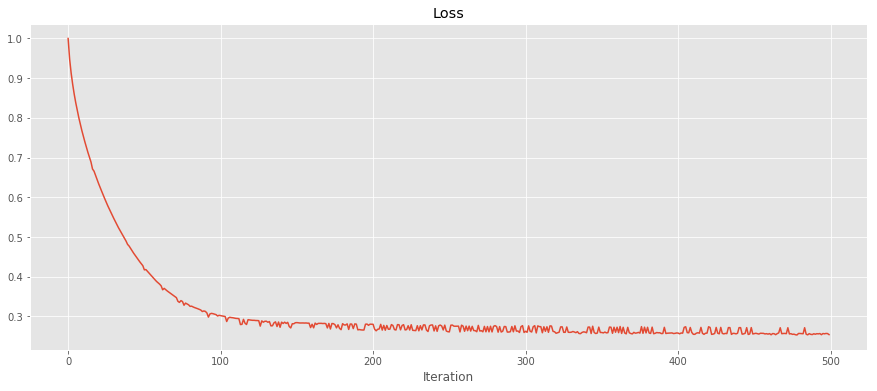

In [33]:
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(111)
ax.plot(loss / loss.max())
ax.set_title("Loss")
ax.set_xlabel("Iteration")
fig.savefig("images/loss.png", transparent=True)

## Save

In [34]:
sess = ed.get_session()

In [35]:
pref_0=sess.run(qpref)
attr_0=sess.run(qattr)

In [36]:
np.save("data/loss", loss)

In [37]:
np.savez("data/act-pop", act=sess.run(qact), pop=sess.run(qpop))

In [38]:
np.savez("data/pref-attr", pref=sess.run(qpref), attr=sess.run(qattr))

# Results

In [39]:
import numpy as np
import pandas as pd
import seaborn
import matplotlib.pyplot as plt

In [40]:
np.random.seed(42)

In [41]:
pref_attr = np.load("data/pref-attr.npz")
rating = np.loadtxt("data/ratings.txt.gz", dtype=np.float32) # Rating matrix
pref = pref_attr["pref"]
attr = pref_attr["attr"]
k = pref.shape[0]
n,m = rating.shape

In [42]:
print(n,m)

2113 9934


In [43]:
pref_attr_org = np.load("../../recsys-hpf-master/data/pref-attr.npz")
rating_org = np.loadtxt("../../recsys-hpf-master/data/ratings.txt.gz", dtype=np.float32)
pref_org = pref_attr_org["pref"]
attr_org = pref_attr_org["attr"]
k = pref_org.shape[0]
n,m = rating_org.shape
print(k,n,m)

20 2113 9936


In [44]:
print(np.array_equal(rating, rating_org))
print(np.array_equal(pref, pref_org))
print(np.array_equal(attr, attr_org))

False
False
False


In [45]:
pref_0[:,0]

array([0.0122337 , 1.4318149 , 0.15069838, 0.42116162, 0.35657373,
       0.08508281, 0.08687284, 0.02265209, 0.23823158, 0.29576546,
       0.02652963, 0.29448682, 0.00782082, 0.2891879 , 1.2379866 ,
       0.30257028, 0.08282299, 0.17744848, 1.8231165 , 2.3961666 ],
      dtype=float32)

In [46]:
pref_org[:,0]

array([1.3312746 , 0.16273671, 0.19792904, 1.408417  , 1.0483493 ,
       0.92429805, 0.07252495, 1.7746221 , 0.08445843, 0.40139073,
       0.42969406, 2.157427  , 0.7275963 , 0.9096571 , 0.36915693,
       0.49714017, 0.13545825, 0.7777848 , 0.03860564, 0.14499435],
      dtype=float32)

In [47]:
movies_all.head()

,userID,movieID,rating,title,imdbPictureURL,year,genre
0,0,2,1.0,Grumpy Old Men,http://ia.media-imdb.com/images/M/MV5BMTI5MTgy...,1993,"Comedy, Romance"
1,0,31,4.5,Twelve Monkeys,http://ia.media-imdb.com/images/M/MV5BMTQwNzg2...,1995,"Sci-Fi, Thriller"
2,0,105,4.0,Braveheart,http://ia.media-imdb.com/images/M/MV5BMTY0ODA1...,1995,"Action, Drama, War"
3,0,150,2.0,Congo,http://ia.media-imdb.com/images/M/MV5BNjI3MTE5...,1995,"Action, Adventure, Mystery, Sci-Fi"
4,0,153,4.0,Desperado,http://ia.media-imdb.com/images/M/MV5BMTM5Mzg3...,1995,"Action, Romance, Thriller"


In [48]:
cols = ["movieID", "title", "imdbPictureURL", "year", "genre"]
meta = movies_all[cols]
meta.drop_duplicates(inplace=True)
meta.sort_values(by="movieID", inplace=True)
meta.set_index("movieID", inplace=True)
print(meta.shape)
meta.head()

(9936, 4)


/Users/felix/.virtualenvs/HPF/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/felix/.virtualenvs/HPF/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,title,imdbPictureURL,year,genre
movieID,,,,
0,Toy story,http://ia.media-imdb.com/images/M/MV5BMTMwNDU0...,1995,"Adventure, Animation, Children, Comedy, Fantasy"
1,Jumanji,http://ia.media-imdb.com/images/M/MV5BMzM5NjE1...,1995,"Adventure, Children, Fantasy"
2,Grumpy Old Men,http://ia.media-imdb.com/images/M/MV5BMTI5MTgy...,1993,"Comedy, Romance"
3,Waiting to Exhale,http://ia.media-imdb.com/images/M/MV5BMTczMTMy...,1995,"Comedy, Drama, Romance"
4,Father of the Bride Part II,http://ia.media-imdb.com/images/M/MV5BMTg1NDc2...,1995,Comedy


In [49]:
meta_org = pd.read_csv("../../recsys-hpf-master/data/info.csv.bz2", index_col=0)
meta_org.head()

,title,imdbPictureURL,year,genre
movieID,,,,
0,Toy story,http://ia.media-imdb.com/images/M/MV5BMTMwNDU0...,1995,"Adventure, Animation, Children, Comedy, Fantasy"
1,Jumanji,http://ia.media-imdb.com/images/M/MV5BMzM5NjE1...,1995,"Adventure, Children, Fantasy"
2,Grumpy Old Men,http://ia.media-imdb.com/images/M/MV5BMTI5MTgy...,1993,"Comedy, Romance"
3,Waiting to Exhale,http://ia.media-imdb.com/images/M/MV5BMTczMTMy...,1995,"Comedy, Drama, Romance"
4,Father of the Bride Part II,http://ia.media-imdb.com/images/M/MV5BMTg1NDc2...,1995,Comedy


In [50]:
pd.concat([meta, meta_org]).drop_duplicates(keep=False).shape[0] == 0

True

## Heatmap

In [51]:
def heatmap(attr, meta, n=20, lw=0.2, cmap="Reds"):
    m = meta.shape[0]
    
    ids = np.random.randint(m, size=n)
    ids = ids[ids<=attr.T.shape[0]]
    ids = np.unique(ids)
    attr = attr.T[ids]
    meta = pd.DataFrame(attr, index=meta.iloc[ids].title)
    
    fig = plt.figure(figsize=(15,6))
    ax = fig.add_subplot(111)
    ax = seaborn.heatmap(meta, ax=ax, annot=True, fmt=".2f", linewidths=lw, cmap=cmap)
    ax.set_xlabel("Attributes")
    ax.set_ylabel("Title")
    fig.savefig("images/heatmap.png", transparent=True)

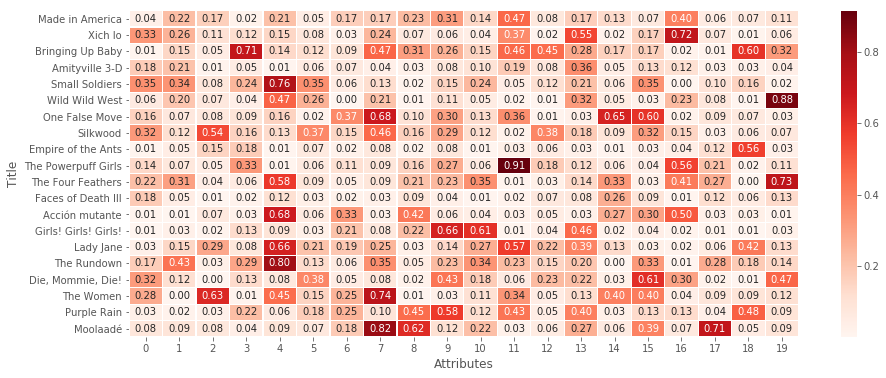

In [52]:
heatmap(attr, meta)

## MDS

In [53]:
def mds(attr, meta, n=20, cmap="Dark2"):
    m = meta.shape[0]
    tohex = plt.cm.colors.rgb2hex
    cmap = plt.cm.get_cmap(cmap)
    kwargs = dict(horizontalalignment="center", weight="bold", verticalalignment="center")
    line = dict(color="grey", linestyle="dashed")
    fig = plt.figure(figsize=(12,5))
    #for i in [1,2]: 
    iy = np.random.randint(k)
    ix = iy
    while ix == iy:
        ix = np.random.randint(k)
    ids = np.unique(np.random.randint(m, size=n))
    ids = ids[ids<=attr.T.shape[0]]
    xs = attr[:,ids][ix]
    ys = attr[:,ids][iy]
        
    text = [meta.iloc[id].title + " ({y})".format(y=meta.iloc[id].year) for id in ids]
  
    ax = fig.add_subplot(1, 1, 1)
    color = lambda v: tohex(cmap(v))
    c = map(color, xs+ys)
    
    ax.scatter(xs, ys-0.02, c=list(c), edgecolors="white")
    for x,y,s in zip(xs,ys,text):
        ax.text(x, y, s, color=tohex(cmap(x+y)), **kwargs)
    
    v = np.median(xs)
    h = np.median(ys)
    ax.axvline(v, **line)
    ax.axhline(h, **line)
    ax.set_ylabel("Attribute vector %d" % iy)
    ax.set_xlabel("Attribute vector %d" % ix)
    #ax.axis("tight")
    
    fig.tight_layout()
    fig.savefig("images/mds.png", transparent=True)

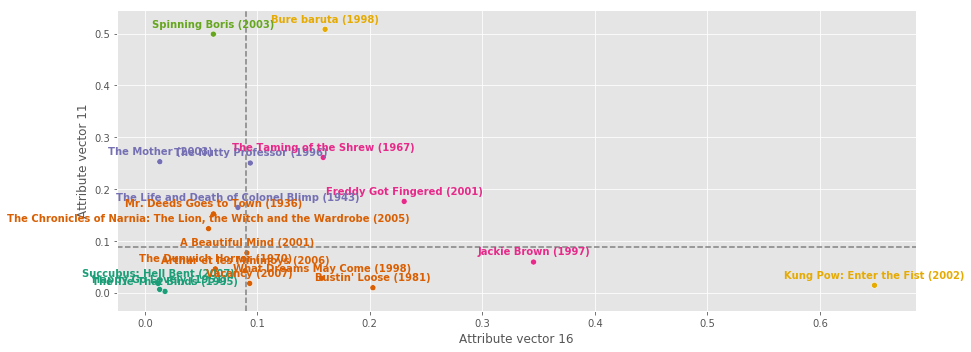

In [54]:
mds(attr, meta)

In [55]:
# Helper functions

def plot_on(fig, meta, title, given=None):
    """
    Plot movies on axes.
    
    Parameters
    ==========
    axs: Matplotlib Axes.
    meta: Movies informations DataFrame.
    given: The rating list.
    """
    
    from urllib.request import urlopen
    from urllib.error import URLError, HTTPError
    from PIL import Image
    
    found = False
    for i,ax in enumerate(fig.axes):
        try:
            url = meta.iloc[i].imdbPictureURL
            img = Image.open(urlopen(url))
            ax.imshow(img)
            found = True
        except (URLError, HTTPError, ValueError):
            kwargs = dict(horizontalalignment="center", verticalalignment="center")
            fontdict = dict(size=15, weight="bold")
            x = 0.5 #round(ax.axes.get_xlim()[0]) / 2
            y = 150 #round(ax.axes.get_ylim()[1]) / 2
            found = False
            ax.text(x, y, "No Picture", fontdict=fontdict, **kwargs)
        
        t,y,g = meta.iloc[i].title, meta.iloc[i].year, meta.iloc[i].genre.split(", ")
        g = "\n".join(g)
        if given is None:
            label = '"{t}"\n{g}\n({y})'.format(t=t,y=y,g=g)
        else:
            r =  given[i]
            label = '"{t}"\n{g}\n({y})\n{r:.1f}'.format(t=t,y=y,g=g,r=r)
        
        ax.set_xlabel(label)
        ax.grid(False)
    
    fig.suptitle(title, fontsize=15, y=1)
    fig.tight_layout()
    return fig

def rated_by(uid, meta, rating, n=5):
    """
    Show movies rated by a given user.
    
    Paramters
    =========
    uid: A user ID (int).
    meta: The DataFrame containing informations about movies.
    rating: The User-Movie rating matrix.
    n: The number of movies to display.
    """
    
    rating = rating[uid]
    ids = rating.nonzero()[0]
    n = n if n <= len(ids) else len(ids)
    ids = np.random.choice(ids, size=n, replace=False)
    rating = rating[ids]
    meta = meta.iloc[ids]
    
    title = 'Movies rated by user "{}"'.format(uid)
    
    fig,axs = plt.subplots(nrows=1, ncols=n, figsize=(3*n, 6), sharey=True)
    fig = plot_on(fig, meta, title, rating)
    
    fig.savefig("images/rated_by.png", transparent=True)

def recommend_to(uid, pref, attr, meta, rating, n=5):
    """
    Show movies recommended to a paticular user.
    
    Paramters:
    ==========
    uid: User ID.
    pref: Users preferences matrix.
    attr: Movies attributes matrix.
    meta: Movies info dataframe.
    rating: Rating matrix.
    """
    poisson = np.random.poisson
    title = 'Movies that user "{}" might like'.format(uid)
    
    # Discard movies already rated by the user,
    m = rating.shape[1] # Number of movies.
    ids = rating[uid].nonzero()[0] # Rated movies IDs.
    ids = np.array([i for i in range(m) if not i in ids]) # Not Rated movies IDs
    pref = pref[:, uid] # User preference
    attr = attr[:, ids]
    
    scores = poisson(np.dot(pref, attr))
    ids = np.array([i for i in np.argsort(-scores) if i in ids]) # Recommended movies IDs
    
    meta = meta.iloc[ids]
    
    fig,axs = plt.subplots(nrows=1, ncols=n, figsize=(3*n, 6), sharey=True)
    fig = plot_on(fig, meta, title)
    
    fig.savefig("images/recommend_to.png", transparent=True)

def similar_to(mid, attr, meta, rating, n=5):
    """
    Show movies closer to a given one int the attribute subspace.
    
    Paramters
    =========
    mid: Movie ID
    attr: Movies attributes matrix.
    meta: Movies informations DataFrame.
    """
    norm = np.linalg.norm
    r = rating[:, mid]
    r = np.median(r[r.nonzero()])
    
    t,y,g = meta.iloc[mid].title, meta.iloc[mid].year, meta.iloc[mid].genre
    title = 'Movies similar to "{t}": {g} ({y}) - {r:.1f}*'.format(t=t, y=y, g=g, r=r)
    
    dist = np.apply_along_axis(norm, 1, attr[:, mid] - attr.T) # Euclidean distance: lower is closer.
    ids = np.argsort(dist)[1:n+1] # Discard the movie itselft
    meta = meta.iloc[ids]
    rating = rating[:, ids]
    #total = np.apply_along_axis(np.count_nonzero, 0, rating) # Uncomment this if you want the mean instead
    #rating = rating.sum(axis=0) / np.where(total == 0, 1, total) # and comment the two following lines.
    rating = np.where(rating == 0, np.nan, rating)
    rating = np.nanmedian(rating, axis=0)
    
    fig,axs = plt.subplots(nrows=1, ncols=n, figsize=(3*n, 6), sharey=True)
    fig = plot_on(fig, meta, title, given=rating)
    
    fig.savefig("images/similar_to.png", transparent=True)

In [56]:
uid = np.random.randint(n)
uid=863

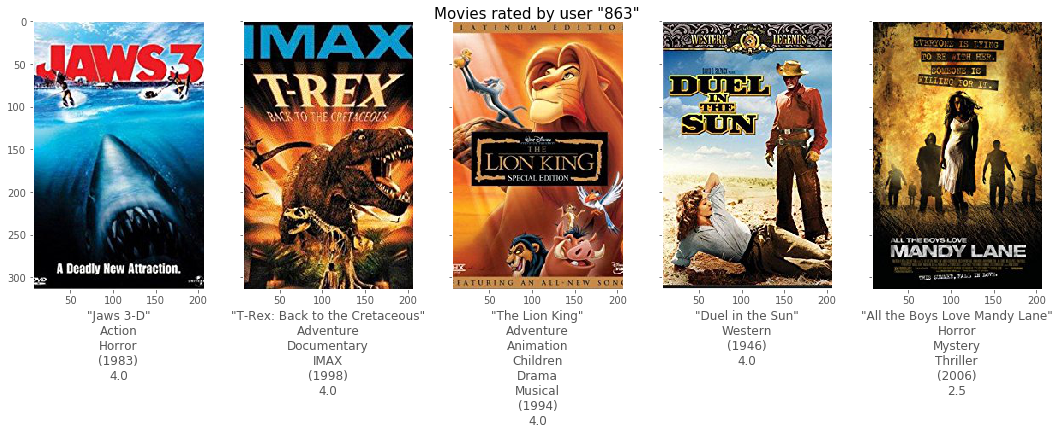

In [57]:
rated_by(uid, meta, rating)

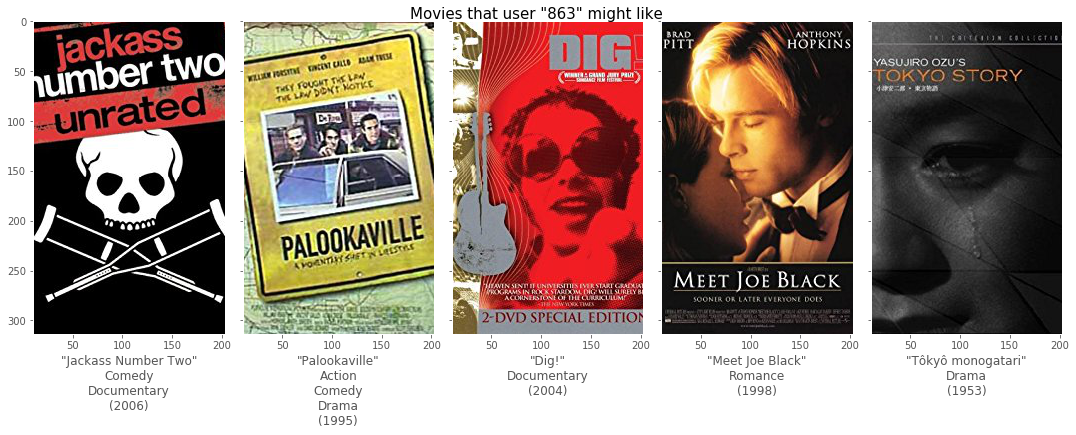

In [58]:
recommend_to(uid, pref, attr, meta, rating)

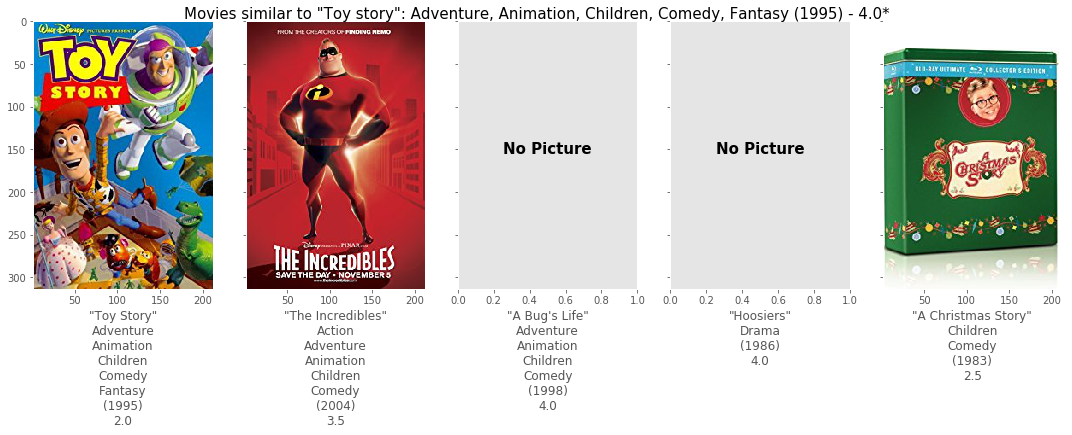

In [59]:
similar_to(0, attr, meta, rating) # Similar to "Toy Story"

In [60]:
def closer_to(mid):
    norm = np.linalg.norm
    dist = np.apply_along_axis(norm, 1, attr[:, mid] - attr.T) # Euclidean distance: lower is closer.
    ids = np.argsort(dist)[:n+1] # Include the movie itselft
    dist = dist[ids]
    info = meta.iloc[ids]
    info["distance"] = dist
    return info

In [61]:
info = closer_to(0) # Toy Story's ID
info.head(6)

/Users/felix/.virtualenvs/HPF/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,title,imdbPictureURL,year,genre,distance
movieID,,,,,
0,Toy story,http://ia.media-imdb.com/images/M/MV5BMTMwNDU0...,1995,"Adventure, Animation, Children, Comedy, Fantasy",0.000000
2827,Toy Story,http://ia.media-imdb.com/images/M/MV5BMTMwNDU0...,1995,"Adventure, Animation, Children, Comedy, Fantasy",0.369752
7767,The Incredibles,http://ia.media-imdb.com/images/M/MV5BNDA4Mzc5...,2004,"Action, Adventure, Animation, Children, Comedy",0.465637
2104,A Bug's Life,http://ia.media-imdb.com/images/M/MV5BMTI5NTc1...,1998,"Adventure, Animation, Children, Comedy",0.496252
3046,Hoosiers,http://ia.media-imdb.com/images/M/MV5BMTI1MDE2...,1986,Drama,0.499300
2534,A Christmas Story,http://ia.media-imdb.com/images/M/MV5BMjEwMzI0...,1983,"Children, Comedy",0.528441
